# Q3: Approximate Quantum Fourier Transform

The Quantum Fourier Transform (QFT) is an essential building block for other quantum algorithms such as Shor's factoring algorithm, quantum chemistry simulations etc.

se the following notebook as a reference for the rest of this question: https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-fourier-transform.ipynb

### Q3 (a): Construct the circuit for a 6-qubit *exact* QFT and simulate it for 10,000 shots (noiseless simulation). Report your result as a histogram (you can reuse code from HW2 for this).

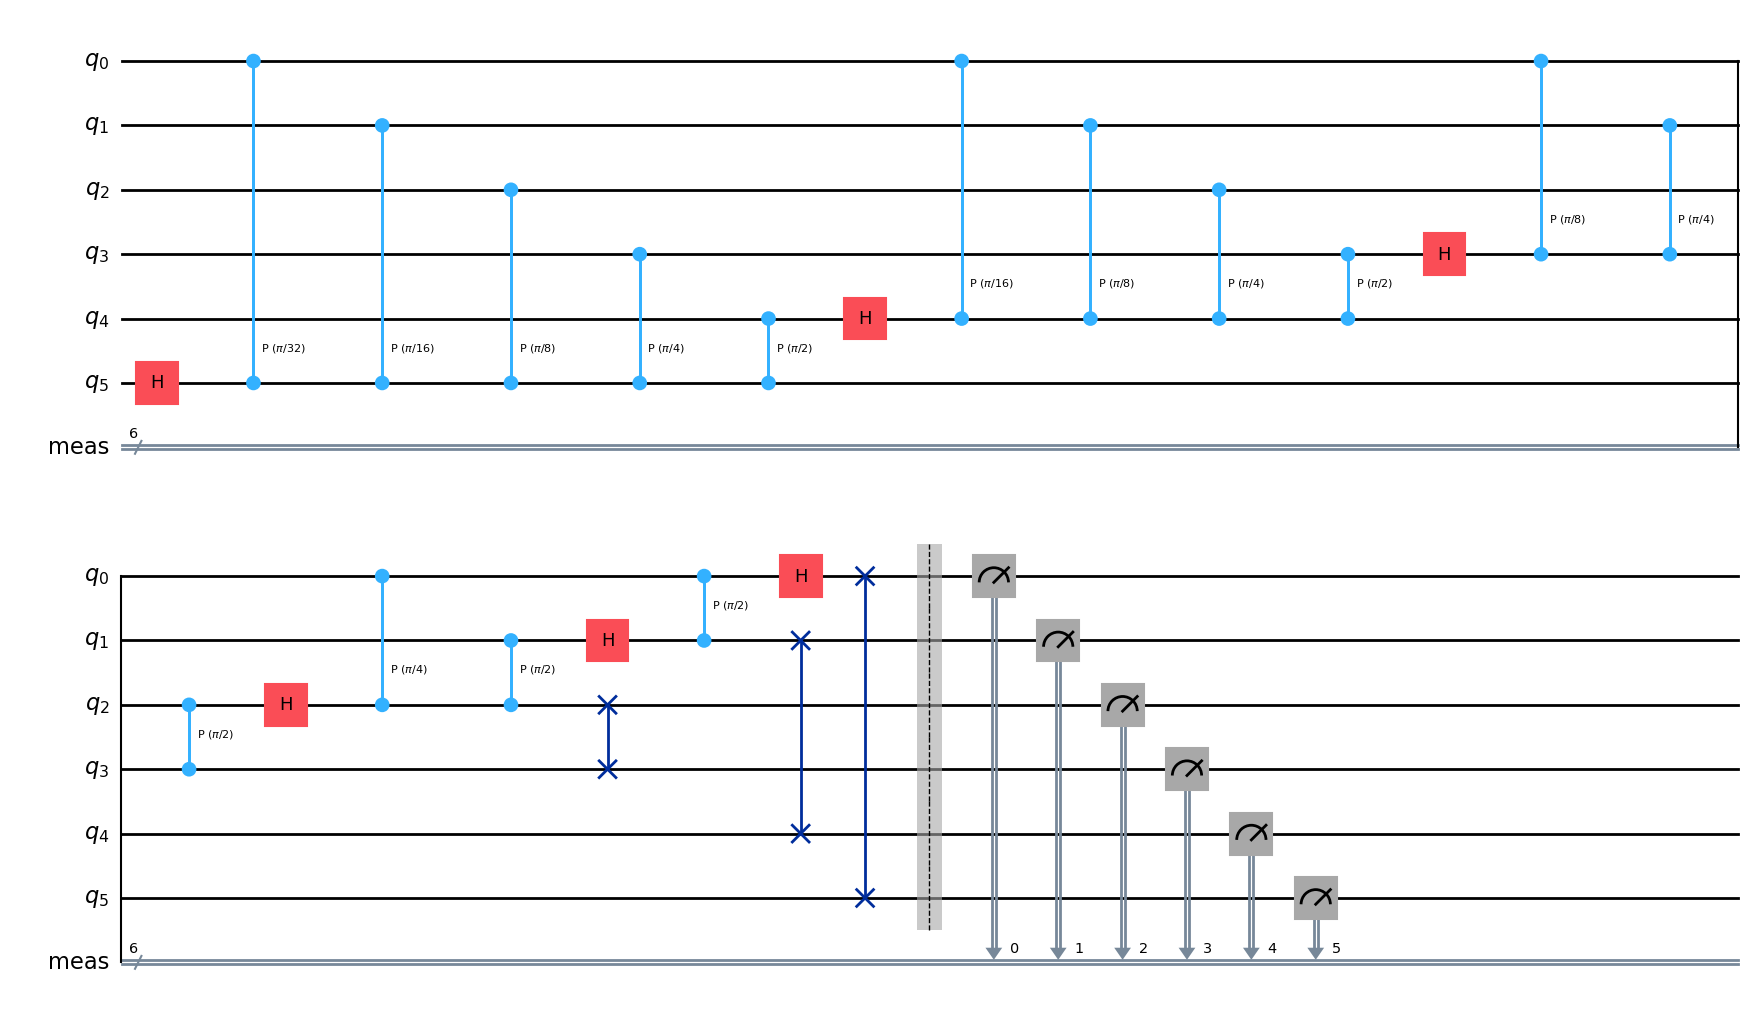

In [ ]:
# Add your code here

def exact_QFT(circuit, n):
    def qft_rotations(circuit, n):
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
    for i in range(n, 0, -1):
        qft_rotations(circuit, i)
    for i in range(n // 2):
        circuit.swap(i, n - 1 - i)

circ = QuantumCircuit(6)
exact_QFT(circ, 6)
circ.measure_all()
circ.draw('mpl')

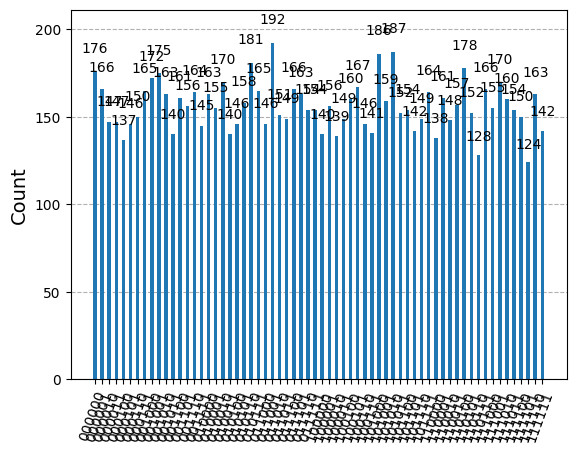

In [ ]:
simulator = AerSimulator()

job = simulator.run(circ, shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Q3 (b): Now modify the circuit you created for an exact QFT to create the circuit for *approximate* QFT. Simulate the approximate QFT circuit using the same simulator and parameters used in part (a). Ignore all rotations smaller than $\pi/2^3$.

In approximate QFT, controlled phase rotations smaller than a threshold are ignored to reduce the total number of gates in the circuit. For more technical info on approximate QFT, refer to this paper: https://arxiv.org/abs/1803.04933.


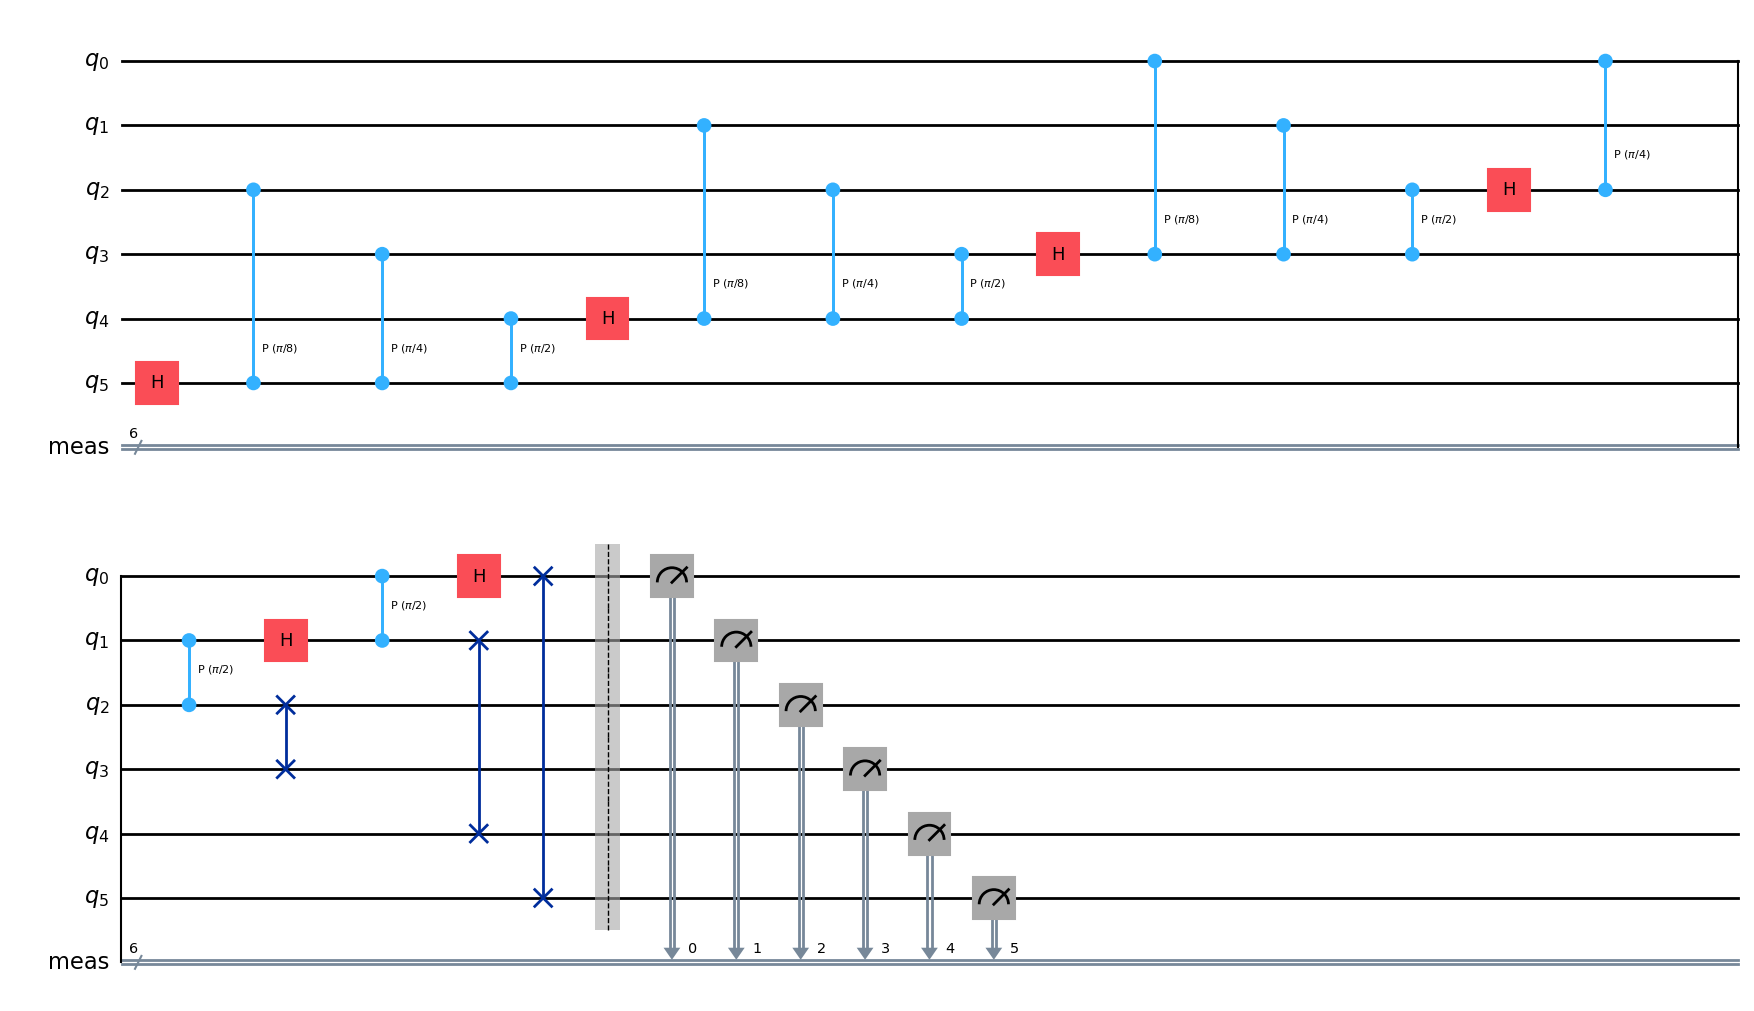

In [ ]:
# Build, simulate, and plot the histogram for the approximate QFT circuit here

def approximate_QFT(circuit, n, threshold):
    def qft_rotations(circuit, n):
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            if np.pi/2**(n-qubit) < threshold:
                continue
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
    for i in range(n, 0, -1):
        qft_rotations(circuit, i)
    for i in range(n // 2):
        circuit.swap(i, n - 1 - i)

circ = QuantumCircuit(6)
approximate_QFT(circ, 6, np.pi / 8)
circ.measure_all()
circ.draw('mpl')

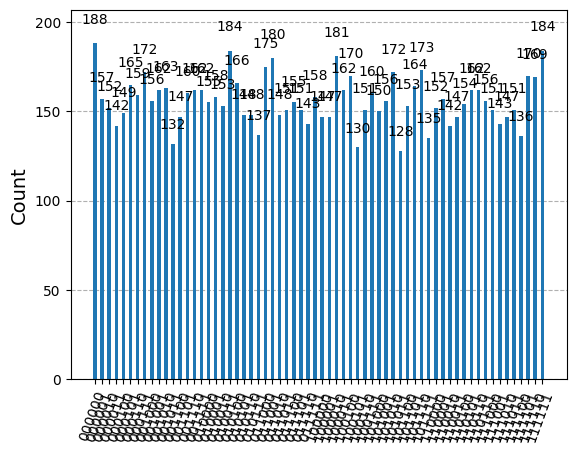

In [ ]:
simulator = AerSimulator()

job = simulator.run(circ, shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Q3 (c): The cost of approximation is accuracy. Since we get a probability distribution from the QFT circuits, how would you compare the exact and approximate QFT circuits? State the method, and compute the metric you use for comparison.

To compare the exact and approximate QFT circuits, we can use the Total Variation Distance (TVD) as the metric. TVD measures the statistical difference between two probability distributions, with a value between 0 (identical) and 1 (completely different). Here’s the code to compute it:

In [ ]:
def tvd(P, Q):
  return 0.5 * np.sum(np.abs(P - Q))

In [ ]:
# Add your code here
n = 6
threshold = np.pi/8
shots = 1000

qc_exact = QuantumCircuit(n)
qc_exact.x(0)
qc_exact.x(5)
exact_QFT(qc_exact, n)
qc_exact.save_statevector()
qc_exact.measure_all()

qc_approx = QuantumCircuit(n)
qc_approx.x(0)
qc_approx.x(5)
approximate_QFT(qc_approx, n, threshold)
qc_approx.save_statevector()
qc_approx.measure_all()

simulator = AerSimulator()

job_exact = simulator.run(qc_exact, shots=shots)
state_exact = job_exact.result().get_statevector(qc_exact)

job_approx = simulator.run(qc_approx, shots=shots)
state_approx = job_approx.result().get_statevector(qc_approx)

print(state_exact, state_approx)

print(tvd(np.power(state_exact, 2), np.power(state_approx, 2)))

Statevector([ 1.25000000e-01-3.06161700e-17j,
             -1.24398091e-01-1.22521425e-02j,
              1.22598160e-01+2.43862903e-02j,
             -1.19617542e-01-3.62855847e-02j,
              1.15484942e-01+4.78354290e-02j,
             -1.10240158e-01-5.89245921e-02j,
              1.03933702e-01+6.94462791e-02j,
             -9.66263067e-02-7.92991605e-02j,
              8.83883476e-02+8.83883476e-02j,
             -7.92991605e-02-9.66263067e-02j,
              6.94462791e-02+1.03933702e-01j,
             -5.89245921e-02-1.10240158e-01j,
              4.78354290e-02+1.15484942e-01j,
             -3.62855847e-02-1.19617542e-01j,
              2.43862903e-02+1.22598160e-01j,
             -1.22521425e-02-1.24398091e-01j,
              3.82702125e-17+1.25000000e-01j,
              1.22521425e-02-1.24398091e-01j,
             -2.43862903e-02+1.22598160e-01j,
              3.62855847e-02-1.19617542e-01j,
             -4.78354290e-02+1.15484942e-01j,
              5.89245921e-02-1.102

### Q3 (d): Now change the threshold for the approximate QFT circuit to $\pi/2^4$ and compare this with the exact QFT circuit using the same metric used in part (c). How does this circuit compare with the earlier approximate QFT circuit which had a larger threshold?

In [ ]:
# Add your code here
n = 6
threshold = np.pi/16
shots = 1000

qc_exact = QuantumCircuit(n)
qc_exact.x(0)
qc_exact.x(5)
exact_QFT(qc_exact, n)
qc_exact.save_statevector()
qc_exact.measure_all()

qc_approx = QuantumCircuit(n)
qc_approx.x(0)
qc_approx.x(5)
approximate_QFT(qc_approx, n, threshold)
qc_approx.save_statevector()
qc_approx.measure_all()

simulator = AerSimulator()

job_exact = simulator.run(qc_exact, shots=shots)
state_exact = job_exact.result().get_statevector(qc_exact)

job_approx = simulator.run(qc_approx, shots=shots)
state_approx = job_approx.result().get_statevector(qc_approx)

print(state_exact, state_approx)

print(tvd(np.power(state_exact, 2), np.power(state_approx, 2)))

Statevector([ 1.25000000e-01-3.06161700e-17j,
             -1.24398091e-01-1.22521425e-02j,
              1.22598160e-01+2.43862903e-02j,
             -1.19617542e-01-3.62855847e-02j,
              1.15484942e-01+4.78354290e-02j,
             -1.10240158e-01-5.89245921e-02j,
              1.03933702e-01+6.94462791e-02j,
             -9.66263067e-02-7.92991605e-02j,
              8.83883476e-02+8.83883476e-02j,
             -7.92991605e-02-9.66263067e-02j,
              6.94462791e-02+1.03933702e-01j,
             -5.89245921e-02-1.10240158e-01j,
              4.78354290e-02+1.15484942e-01j,
             -3.62855847e-02-1.19617542e-01j,
              2.43862903e-02+1.22598160e-01j,
             -1.22521425e-02-1.24398091e-01j,
              3.82702125e-17+1.25000000e-01j,
              1.22521425e-02-1.24398091e-01j,
             -2.43862903e-02+1.22598160e-01j,
              3.62855847e-02-1.19617542e-01j,
             -4.78354290e-02+1.15484942e-01j,
              5.89245921e-02-1.102

With a smaller threshold, the value of tvd get smaller. Which means it is more close to exact_QFT.

### Q3 (e): Now compare the gate counts of the exact QFT circuit with that of the two approximate QFT circuits you created.

In [ ]:
# Add your code here
qc_exact = QuantumCircuit(6)
exact_QFT(qc_exact, 6)

qc_approx_a = QuantumCircuit(6)
approximate_QFT(qc_approx_a, 6, np.pi/8)

qc_approx_b = QuantumCircuit(6)
approximate_QFT(qc_approx_b, 6, np.pi/16)

print(f"Exact QFT: {qc_exact.count_ops()}")
print(f"Approximate QFT with threshold = pi/8: {qc_approx_a.count_ops()}")
print(f"Approximate QFT with threshold = pi/16: {qc_approx_b.count_ops()}")

Exact QFT: OrderedDict([('cp', 15), ('h', 6), ('swap', 3)])
Approximate QFT with threshold = pi/8: OrderedDict([('cp', 12), ('h', 6), ('swap', 3)])
Approximate QFT with threshold = pi/16: OrderedDict([('cp', 14), ('h', 6), ('swap', 3)])
